# Neural Network Example

Xây dựng neural network với hai tầng ẩn (hidden layer). Các trọng số và mối liên hệ giữa các tầng ẩn được thiết lập và cài đặt bằng việc sử dụng API của thư viện PyTorch

## Neural Network Overview

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

## MNIST Dataset Overview



In [27]:
from __future__ import absolute_import, division, print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np

In [28]:
# Preparing data
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Change the form to float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Standart images from [0, 255] to [0,1]
x_train, x_test = x_train / 255., x_test / 255.
x_train, x_test, y_train, y_test = torch.from_numpy(x_train), torch.from_numpy(x_test), torch.from_numpy(y_train).type(torch.LongTensor), torch.from_numpy(y_test).type(torch.LongTensor)

In [29]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [30]:
batch_size = 16

In [31]:
trainloader = []
for (i,j) in zip(x_train, y_train):
    trainloader.append([i,j])
trainloader = torch.utils.data.DataLoader(trainloader, shuffle=True, batch_size=batch_size)

testloader = []
for (i,j) in zip(x_test, y_test):
    testloader.append([i,j])
testloader = torch.utils.data.DataLoader(testloader, shuffle=True, batch_size=batch_size)

## Hiển thị một vài ví dụ

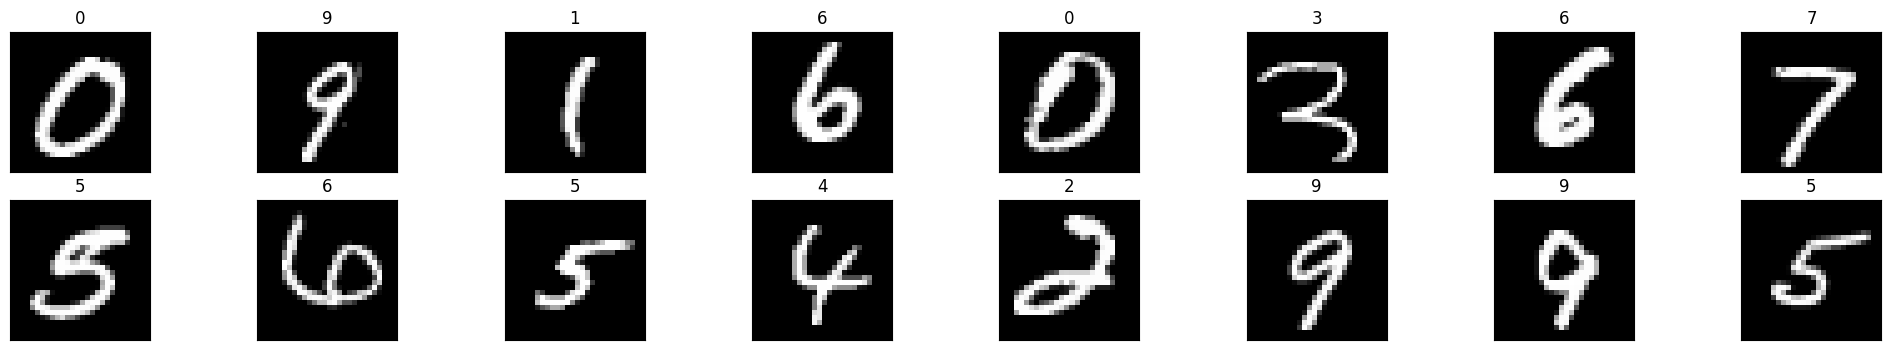

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(trainloader)
images, labels = next(dataiter)
images = images.numpy()

# hiển thị dữ liệu theo từng batch và nhãn tương ứng
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, int(batch_size / 2), idx + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))

In [33]:
import torch.nn as nn
import torch.nn.functional as F

## định nghĩa mạng
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(num_features, n_hidden_1)
        # linear layer (n_hidden -> output)
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.fc3 = nn.Linear(n_hidden_2, num_classes)

    def forward(self, x):
        # chuyển từ định dạng ma trận thành vector
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# initialize the NN
model = MLPModel()
print(model)

MLPModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [34]:
import torch.optim as optim
# trong hàm loss cross entropy đã áp dụng hàm soft max cho vector đầu ra
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [35]:
def accuracy():
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct/total

In [36]:
losses = []
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses.append(running_loss)
    if epoch % 10 == 9:
        print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

print('Finished Training')

Iteration: 10, accuracy: 0.973
Iteration: 20, accuracy: 0.978
Iteration: 30, accuracy: 0.977
Iteration: 40, accuracy: 0.979
Iteration: 50, accuracy: 0.979
Iteration: 60, accuracy: 0.979
Iteration: 70, accuracy: 0.980
Iteration: 80, accuracy: 0.980
Iteration: 90, accuracy: 0.980
Iteration: 100, accuracy: 0.980
Finished Training


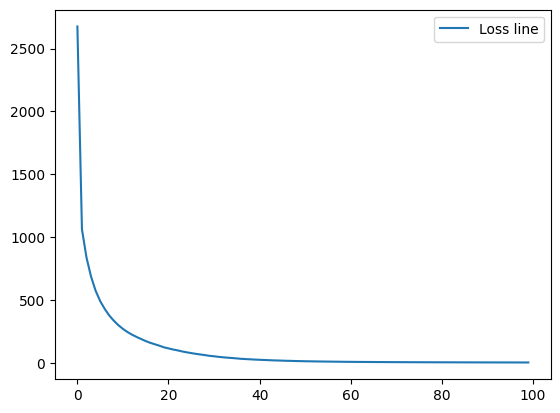

In [37]:
# Biểu đồ biểu diễn độ biến thiên của hàm mất mát qua các vòng lặp
plt.plot([i for i in range(len(losses))], losses, label='Loss line')
# plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()

## Bài tập

*   Tiến hành huấn luyện mô hình với số lượng epoch lần lượt là 50, 100, 150.Rút ra nhận xét.



In [38]:
losses = []
for epoch in range(50):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses.append(running_loss)
    if epoch % 10 == 9:
        print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

print('Finished Training')

Iteration: 10, accuracy: 0.980
Iteration: 20, accuracy: 0.980
Iteration: 30, accuracy: 0.980
Iteration: 40, accuracy: 0.980
Iteration: 50, accuracy: 0.980
Finished Training


In [39]:
losses = []
for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses.append(running_loss)
    if epoch % 10 == 9:
        print('Iteration: %d, accuracy: %.3f' %(epoch + 1, accuracy()))

print('Finished Training')

Iteration: 10, accuracy: 0.980
Iteration: 20, accuracy: 0.980
Iteration: 30, accuracy: 0.980
Iteration: 40, accuracy: 0.980
Iteration: 50, accuracy: 0.980
Iteration: 60, accuracy: 0.980
Iteration: 70, accuracy: 0.980
Iteration: 80, accuracy: 0.980
Iteration: 90, accuracy: 0.980
Iteration: 100, accuracy: 0.980
Finished Training




*   Hiển thị một số kết quả



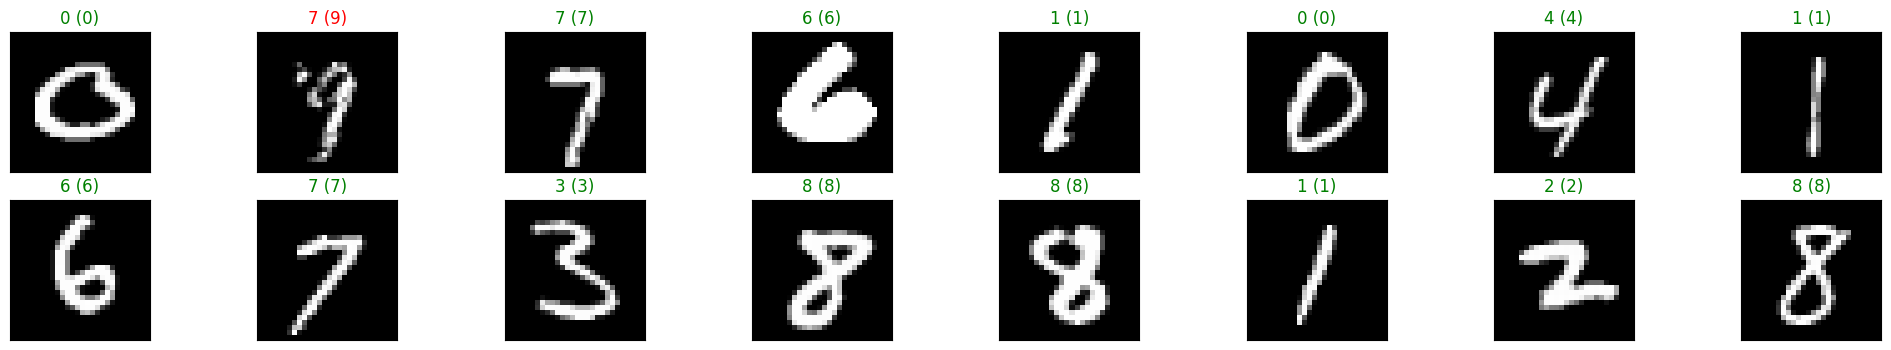

In [40]:
# obtain one batch of test images
dataiter = iter(testloader)
(images, labels) = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, int(batch_size/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

## Bài tập

*   Thiết lập thêm 3 mạng nơ ron với số tầng ẩn lần lượt là 3,5 (số lượng nơ ron của các tầng tùy ý). Với mỗi mạng mới được sinh ra, áp dụng learning-rate lần lượt bằng 0.1, 0,05, 0.001 để huấn luyện. Huấn luyện qua khoảng 100 epoch.
*   Chia tập train hiện có thành 2 phần. **85%** dữ liệu làm tập **train**, **15%** còn lại làm tập **dev**. Huấn luyện các mô hình tạo ra ở bước trên với tập **train** mới, sau đó kiểm thử trên tập **dev**.
* Dùng các model kiểm thử trên tập **test**. So sánh model cho kết quả tốt nhất khi kiểm thử trên 2 tập này và rút ra nhận xét về vai trò của tập **dev**



In [41]:
# Chuẩn bị dữ liệu
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Chuyển đổi sang định dạng float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Chuẩn hóa ảnh từ from [0, 255] to [0, 1].
x_train, x_test = x_train / 255, x_test / 255
x_train, x_test, y_train, y_test = torch.from_numpy(x_train), torch.from_numpy(x_test), torch.from_numpy(y_train).type(torch.LongTensor), torch.from_numpy(y_test).type(torch.LongTensor)

In [42]:
# Chia tập train thành 2 phần: 85% cho train, 15% cho dev
from sklearn.model_selection import train_test_split
x_trainn, x_dev, y_trainn, y_dev = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

In [43]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.
n_hidden_3 = 512 # 2nd layer number of neurons.
n_hidden_4 = 1024 # 2nd layer number of neurons.
n_hidden_5 = 2048 # 2nd layer number of neurons.

In [44]:
trainloader = []
for (i,j) in zip(x_train, y_train):
    trainloader.append([i,j])
trainloader = torch.utils.data.DataLoader(trainloader, shuffle=True, batch_size=batch_size)

trainnloader = []
for (i,j) in zip(x_trainn, y_trainn):
    trainnloader.append([i,j])
trainnloader = torch.utils.data.DataLoader(trainnloader, shuffle=True, batch_size=batch_size)

devloader = []
for (i,j) in zip(x_dev, y_dev):
    devloader.append([i,j])
devloader = torch.utils.data.DataLoader(devloader, shuffle=True, batch_size= batch_size)

testloader = []
for (i,j) in zip(x_test, y_test):
    testloader.append([i,j])
testloader = torch.utils.data.DataLoader(testloader, shuffle=True, batch_size=batch_size)

In [45]:
# Mô hình gồm 3 hidden layer
import torch.nn as nn
import torch.nn.functional as F

## định nghĩa mạng
class MLPModel3(nn.Module):
    def __init__(self):
        super(MLPModel3, self).__init__()
        self.fc1 = nn.Linear(num_features, n_hidden_1)
        # linear layer (n_hidden -> output)
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.fc3 = nn.Linear(n_hidden_2, n_hidden_3)
        self.fc4 = nn.Linear(n_hidden_3, num_classes)

    def forward(self, x):
        # chuyển từ định dạng ma trận thành vector
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# initialize the NN
model_3 = MLPModel3()
print(model_3)

MLPModel3(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=10, bias=True)
)


In [46]:
def accuracy_3():
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model_3(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct/total

In [55]:
import torch.optim as optim
# trong hàm loss cross entropy đã áp dụng hàm soft max cho vector đầu ra
criterion = nn.CrossEntropyLoss()
optimizer_0 = optim.SGD(model_3.parameters(), lr=0.1)
optimizer_1 = optim.SGD(model_3.parameters(), lr=0.05)
optimizer_2 = optim.SGD(model_3.parameters(), lr=0.001)


In [56]:
losses = []

# Train với ba learning rate khác nhau, mỗi cái 100 lần
for optimizer in [optimizer_0, optimizer_1, optimizer_2]:
  for epoch in range(50):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model_3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses.append(running_loss)
    if epoch % 10 == 9:
        # Giờ hiện ra số accu của mỗi learning rate khác nhau tại các epoch
        print('Iteration: %d, accuracy for learning rate %s: %.3f' %(epoch + 1,optimizer.param_groups[0]['lr'], accuracy_3()))
  print('Finished Training')

Iteration: 10, accuracy for learning rate 0.1: 0.982
Iteration: 20, accuracy for learning rate 0.1: 0.983
Iteration: 30, accuracy for learning rate 0.1: 0.986
Iteration: 40, accuracy for learning rate 0.1: 0.986
Iteration: 50, accuracy for learning rate 0.1: 0.986
Finished Training
Iteration: 10, accuracy for learning rate 0.05: 0.986
Iteration: 20, accuracy for learning rate 0.05: 0.986
Iteration: 30, accuracy for learning rate 0.05: 0.986
Iteration: 40, accuracy for learning rate 0.05: 0.986
Iteration: 50, accuracy for learning rate 0.05: 0.986
Finished Training
Iteration: 10, accuracy for learning rate 0.001: 0.986
Iteration: 20, accuracy for learning rate 0.001: 0.986
Iteration: 30, accuracy for learning rate 0.001: 0.986
Iteration: 40, accuracy for learning rate 0.001: 0.986
Iteration: 50, accuracy for learning rate 0.001: 0.986
Finished Training


In [57]:
# Mô hình gồm 5 hidden layer
import torch.nn as nn
import torch.nn.functional as F

## định nghĩa mạng
class MLP5Model(nn.Module):
    def __init__(self):
        super(MLP5Model, self).__init__()
        self.fc1 = nn.Linear(num_features, n_hidden_1)
        # linear layer (n_hidden -> output)
        self.fc2 = nn.Linear(n_hidden_1, n_hidden_2)
        self.fc3 = nn.Linear(n_hidden_2, n_hidden_3)
        self.fc4 = nn.Linear(n_hidden_3, n_hidden_4)
        self.fc5 = nn.Linear(n_hidden_4, n_hidden_5)
        self.fc6 = nn.Linear(n_hidden_5, num_classes)

    def forward(self, x):
        # chuyển từ định dạng ma trận thành vector
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        return x

# initialize the NN
model_5 = MLP5Model()
print(model_5)

MLP5Model(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=1024, bias=True)
  (fc5): Linear(in_features=1024, out_features=2048, bias=True)
  (fc6): Linear(in_features=2048, out_features=10, bias=True)
)


In [58]:
def accuracy_5():
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model_5(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct/total

In [59]:
import torch.optim as optim
# trong hàm loss cross entropy đã áp dụng hàm soft max cho vector đầu ra
criterion = nn.CrossEntropyLoss()
optimizer_0 = optim.SGD(model_5.parameters(), lr=0.1)
optimizer_1 = optim.SGD(model_5.parameters(), lr=0.05)
optimizer_2 = optim.SGD(model_5.parameters(), lr=0.001)

In [63]:
losses = []

# Train với ba learning rate khác nhau, mỗi cái 30 lần
for optimizer in [optimizer_0, optimizer_1, optimizer_2]:
  for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model_5(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    losses.append(running_loss)
    if epoch % 10 == 9:
        print('Iteration: %d, accuracy for learning rate %s: %.3f' %(epoch + 1,optimizer.param_groups[0]['lr'], accuracy_5()))

  print('Finished Training')

Iteration: 10, accuracy for learning rate 0.1: 0.982
Finished Training
Iteration: 10, accuracy for learning rate 0.05: 0.985
Finished Training
Iteration: 10, accuracy for learning rate 0.001: 0.985
Finished Training


In [65]:
# Chạy trên tập trainn (train mới và tập dev)

# Bước 1: Tạo accu khi kiểm thử trên tập dev

def accuracy_dev():
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in devloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = model_5(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct/total


# Bước 2: Huấn luyện trên tập train và kiểm thử trên tập dev
# Ở đây, ta chọn mô hình có 5 hidden layer, learning rate = 0.05
# Huấn luyện và kiểm thử
losses = []
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainnloader, 0):  # Sử dụng trainnloader để load dữ liệu train
        # Lấy inputs và labels từ batch
        inputs, labels = data

        # Reset lại gradient
        optimizer_1.zero_grad()

        # Forward pass
        outputs = model_5(inputs)
        loss = criterion(outputs, labels)
        loss.backward()

        # Cập nhật weights
        optimizer_1.step()

        # Lưu lại loss
        running_loss += loss.item()
        losses.append(running_loss)

    # Kiểm thử trên tập validation sau mỗi epoch
    if epoch % 10 == 9:  # Bạn có thể điều chỉnh tần suất in ra kết quả
        print('Iteration: %d, accuracy for learning rate %s: %.3f' %
              (epoch + 1, optimizer_1.param_groups[0]['lr'], accuracy_dev()))
        print('Finished Training on Validation Set')

    # Sau khi hoàn tất huấn luyện, kiểm thử trên tập test
    test_accuracy = accuracy_5()
    print(f'Test Accuracy at epoch {epoch+1}: {test_accuracy:.3f}')





Test Accuracy at epoch 1: 0.985
Test Accuracy at epoch 2: 0.985
Test Accuracy at epoch 3: 0.985
Test Accuracy at epoch 4: 0.985
Test Accuracy at epoch 5: 0.985
